In [1]:
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import nltk
import string
import re

In [2]:
root_dir = Path(os.getcwd()).parent
data_dir = 'data'
train_file = os.path.join(root_dir, data_dir, 'train.csv')
test_file = os.path.join(root_dir, data_dir, 'test.csv')

In [3]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

## Exploratory data analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


<AxesSubplot:xlabel='label', ylabel='Count'>

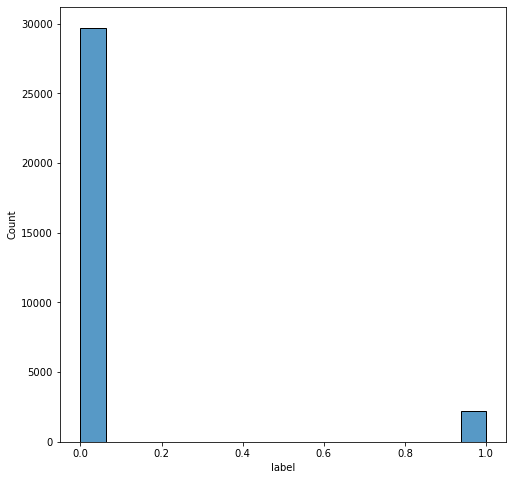

In [6]:
plt.figure(figsize=(8,8))
sns.histplot(x='label', data=train)

In [7]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
#remove punctuation, remove marks, remove urls, lower case, remove stop words, remove numbers, remove lowercase, remove ascii charachters
def removePuncStr(s):
    for c in string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§':
        s = s.replace(c, ' ').strip()
    return s

def removePunc(array):
    return [removePuncStr(str_) for str_ in array]

#remove numbers
def removeNumbersStr(s):
    for d in range(10):
        s = s.replace(str(d), ' ')
    return s

def removeNumbers(array):
    return [removeNumbersStr(str_) for str_ in array]

#Lemmatization
# import spacy
# nlp = spacy.load('en_core_web_sm')
# def LemmatizeStr(s):
#     doc = nlp(str(s))
#     h = ''
#     for token in doc:
#         h = h + ' ' + str(token.lemma)
#     return h

# def Lemmatize(array):
    # return [LemmatizeStr(sent) for sent in array]    
    
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize(text_array):
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            h2 = h2 + ' ' + WNlemmatizer.lemmatize(w)
        lemmatized_text.append(h2)
    return lemmatized_text

def stopText(array):
    stop_words =set(stopwords.words('english'))
    stop_words.add('corona')
    stop_words.add('covid')
    stop_words.add('coronavirus')
    stopped_text = []
    for h in array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text

def removeSpacesStr(s):
    spaces = ['\t', '\r', '\n']
    for space in spaces:
        s = s.replace(space, ' ')
        
def removeSpaces(array):
    return [removeNumbersStr(sent) for sent in array]

def Lowercase(array):
    return [str(sent).lower() for sent in array]

def removeUrl(text_array):
    pattern = r"https://.+\S*"
    removed = []
    for s in text_array:
        s = re.sub(pattern, ' ', s)
        removed.append(s)
    return removed
def removeAscii(text_array):
    return [re.sub(r'[^\x00-\x7f]', '', s) for s in text_array]

In [11]:
def clean(text_array):
    text_array = removeUrl(text_array)
    text_array = removePunc(text_array)
    text_array = removeNumbers(text_array)
    text_array = removeSpaces(text_array)
    text_array = Lowercase(text_array)
    text_array = lemmatize(text_array)
    text_array = removeAscii(text_array)
    return text_array

In [12]:
cleaned_tweet = clean(train.tweet)
cleaned_tweet[:50]

[' user when a father is dysfunctional and is so selfish he drag his kid into his dysfunction run',
 ' user user thanks for lyft credit i can t use cause they don t offer wheelchair van in pdx disapointed getthanked',
 ' bihday your majesty',
 ' model i love u take with u all the time in ur  ',
 ' factsguide society now motivation',
 ' huge fan fare and big talking before they leave chaos and pay dispute when they get there allshowandnogo',
 ' user camping tomorrow user user user user user user user danny ',
 ' the next school year is the year for exam  can t think about that  school exam hate imagine actorslife revolutionschool girl',
 ' we won love the land allin cavs champion cleveland clevelandcavaliers ',
 ' user user welcome here i m it s so gr',
 '  ireland consumer price index mom climbed from previous to in may blog silver gold forex',
 ' we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love',
 ' i get to see my 

In [13]:
train['cleaned_tweet'] = clean(train.tweet)
test['cleaned_tweet'] = clean(test.tweet)

In [15]:
import wordcloud

## Word Cloud
hate_block = train[train['label'] == 1]['cleaned_tweet']
nonHate_block = train[train['label'] == 0]['cleaned_tweet']

## remove stop words
stopped_hate = stopText(hate_block.values)
stopped_nonHate = stopText(nonHate_block.values)

hate_text = ''.join(list(stopped_hate))
nonHate_text = ''.join(list(stopped_nonHate))

(-0.5, 399.5, 199.5, -0.5)

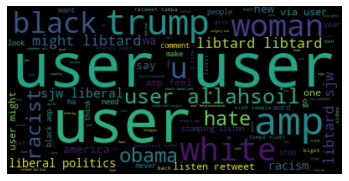

In [16]:
#word cloud for hate tweet
word_cloud = wordcloud.WordCloud().generate(hate_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

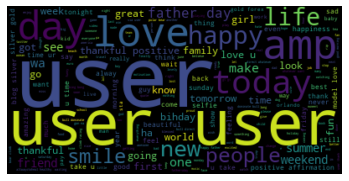

In [17]:
# word cloud for nonHate tweet
word_cloud = wordcloud.WordCloud().generate(nonHate_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')